In [2]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
total = pd.read_csv("tot.csv",index_col=0)
total.shape

(56532, 2)

In [4]:
total.head()

,comment,without_stop_words
0,1422 find your sustainable 433\n3 optimize you...,sustainable optimize plan fat loss muscle gain
1,i have been training regularly again since las...,train regularly since x per mo tue thu fri mo ...
2,if youre hating the journey to a healthier you...,hat journey healthier healthy hit goal
3,2 sustainable routines\n3 optimizing plan afte...,sustainable routine optimize plan rest highest...
4,for me personally 2 times a week is the most i...,personally improvement stress whatever third w...


In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download stopwords and lemmatizer data and punkt
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    
    # Degits and Punctuation removal and lowercase
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r"\d+", "", text)
    text = text.lower()
    
    # Tokenize text into words
    tokens = word_tokenize(text)

    # Remove stopwords
    additional_stopwords = list(set(['good','u','im','dr','berg','enough','use','want','thats','said','sometime','thank','see','much',
                                'go','find','make','one','day','think','month','year','maybe','week','youre',"going","make","thing",
                                'especially','u','mean','hour','almost','used','ect','look','dont','doesnt','may',"etc","told","another",
                                'easy','right','well','give','age','cant','lot','ive','love','still','dr berg',"last",'amazing',"didnt",
                                'end','many','went','know','take','come','say','come','gon na','time','video','done',"alway",'little','hi',
                                'hour','true','year','ago','become','man','even','isnt','people','everything','literally','without','keto',
                                'really','thanks','made','seem',"got","ate","let",'getting','add','pretty','year','old','watch','ok','least',
                                'found','never','thought','le','put','idea',"hard","every",'starting',"keep","person",'feeling',"someone", "god",
                                'day','bad','guy','trying','started','understand','new','anuone',"able",'lol','due',"big",'live',"two",       
                                'month','gon','na','sometimes','best',"happy","least",'felt','daily','hole','last',"amazing",'definitely',
                                "tried",'part','hope','long','fast','please','half','kind',"important",'reason',"instead",'stuff','great',
                                'making','away','today','using','tell','told','week','normal','something','feel',"month",'day','year','years'
                                ,'actually','added',"already",'also','always','amount',"anyone",'anything','around',"appreciate",'different'
                                ,'bit',"bp","bro",'gave','lb',"need",'like','oat',"get",'help','pm','stop']))

    stop_words = set(stopwords.words('english'))
    stop_words.update(additional_stopwords )
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word,pos="v") for word in tokens]

    
    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\a\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\a\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\a\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
total["without_stop_words"]=total["comment"].apply(preprocess_text)
total["without_stop_words"]=total["without_stop_words"].apply(preprocess_text)

(-0.5, 799.5, 599.5, -0.5)

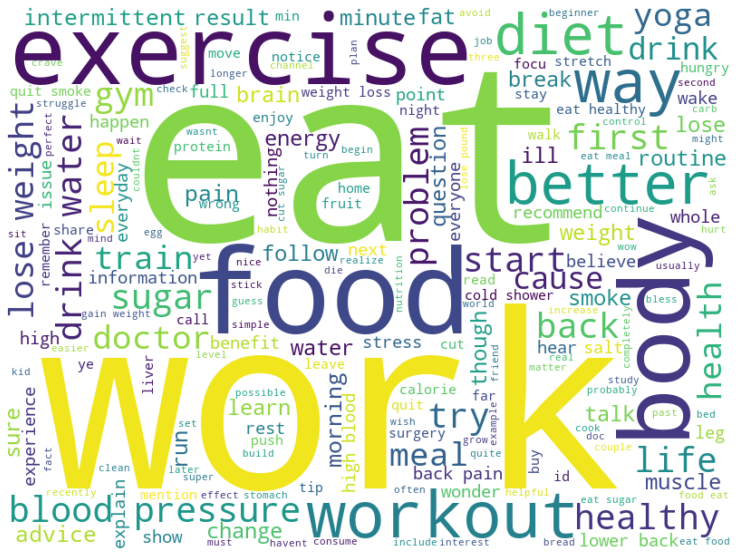

In [22]:
import matplotlib
import pylab as plt

from wordcloud import WordCloud
# Generate a word cloud image
wordcloud = WordCloud(width=800, height=600, background_color='white').generate(" ".join(total['without_stop_words']))
plt.figure(figsize=(16,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [8]:
total['without_stop_words']=total['without_stop_words'].apply(lambda x: re.sub(r"\d+", "", x))

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
print('Tfidf ponderations')

# Initialize the "TfidfVectorizer" object.
tfidf_vect = TfidfVectorizer(max_features=300)
X_tfidf = tfidf_vect.fit_transform(total['without_stop_words'])

# Numpy arrays are easy to work with, so convert the result to an array
vectorizer_features = X_tfidf.toarray()
tfidf_frequency_matrix = pd.DataFrame(vectorizer_features,columns=tfidf_vect.get_feature_names_out())
tfidf_frequency_matrix

Tfidf ponderations


,ab,advice,affect,arm,ask,avoid,back,banana,base,bed,...,work,workout,world,would,wow,wrong,yes,yet,yoga,youtube
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.557721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.484429,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=45, random_state=42)
kmeans.fit(vectorizer_features)

C:\Users\a\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=45, random_state=42)

In [11]:
cluster_labels = kmeans.labels_
total['cluster'] = cluster_labels.tolist()

In [14]:
feature_names = tfidf_vect.get_feature_names_out()
centroids = kmeans.cluster_centers_
cluster_topics = []
for i, centroid in enumerate(centroids):
    top_indices = centroid.argsort()[-5:][::-1]
    cluster_topics.append([feature_names[ind] for ind in top_indices])

### prediction

In [15]:
def predict(my_text):
    preprocessed_text = preprocess_text(my_text)
    text_vector = tfidf_vect.transform([preprocessed_text])
    predicted_cluster = kmeans.predict(text_vector)
    print(f"cluster {predicted_cluster}")
    print(f"this cluster discuss these topics {cluster_topics[int(predicted_cluster)]}")
    print("\nthese are some comment of the same cluster\n",total[total['cluster']==int(predicted_cluster)]['comment'].sample(n=5).values)

In [18]:
my_text = "i am a beginner want to start a new workout program and i don't know where to start "
predict(my_text)

cluster [8]
this cluster discuss these topics ['beginner', 'workout', 'start', 'exercise', 'gym']

these are some comment of the same cluster
 ['bro i am beginner and my weight is 51 can i do with proper diet'
 'this was beginner and i barely made it through took lots of breaks cant wait till im able to get through the entire thing without stopping'
 'hello sir thx for the video i also want lower body workout sir and for beginners how many days do i have to follow this tutorial'
 'legs were shaking during the stretch cool down and this is the beginner workout youve got an amazing level of fitness'
 'i have a question \ni understand that for a beginner these are the only excercises you should prioritise amd focus on but should you do any stretches before and after the workout']


In [84]:
my_text = "i want to start intermittent fasting what i should do"
predict(my_text)

cluster [25]
this cluster discuss these topics ['intermittent', 'lose', 'eat', 'weight', 'work']

these are some comment of the same cluster
 ['intermittent fasting is easy when you dont have much money  '
 'anyone who is teen and still want to try intermittent fasting '
 'this guy is amazing been watching his videos for two years before i decided to give intermittent fasting a try down 27 pounds in 3 months all i did was omad and walk i still ate carbs tho and i wasnt supper strict on myself'
 'thats true i never wanted to eat early morning it was something unnatural for me but civilization brainwashed me and here i am i am on intermittent fasting already 4 days 168 and absolutely happy that i dont have to keep on eating the whole day greeting from russia to everyone '
 'thats awesome ive been intermittent fasting now for four and a half months and lost nearly 60 lb i did it once before and lost 58 lb in two and a half months and was as skinny as i was in my twenties im 52 now intermi

In [85]:
my_text = "i start a new eating program with no sugar"
predict(my_text)

cluster [44]
this cluster discuss these topics ['sugar', 'eat', 'quit', 'cut', 'food']

these are some comment of the same cluster
 ['every day that i dont eat sugar ill put an emoji here\n11022022\n0'
 'hi dr berg erythritol is very effective at creating glace fruits the significance is that it has similar crystallising properties to sugar i am concerned that sugar alcohols as substitutes are not the holy grail we may think them to be and can still contribute to arterial stiffness despite not affecting our insulin levels what are your thoughts'
 'maple syrup has tons of manganese along with other minerals its the most nutritious of any sugar \ngreat vid thank you from canada '
 'i dont agree with the chewing gum you have to look at the label  almost all of the sugar free gum i have found has maltodextrin  which is worse than sugar'
 'i cut sugar a long time ago every once in a while someone cons me into eating something high in sugar i feel like crap for a day or two after low energy 

In [86]:
my_text = "i suffer from eye dry espicially when i work in my laptop"
predict(my_text)

cluster [19]
this cluster discuss these topics ['eye', 'dry', 'drop', 'doctor', 'cause']

these are some comment of the same cluster
 ['i am a female after i turned 51 i started having dry eyes my eye lids started to get swollen\n\nmy eye doctor said that i started having blephamitis and had eye stye \nnow the top lids get cracked and sometimes bleed leaving a red arch on top of my lids'
 'dr please is there a relation between severe eye dryness and eyelid concretions'
 'and the youtube algorithm wins again i definitely needed to see this with my extremely dry eyes i think this was the motivation i needed to finally talk to my optometrist about how my eyelids stick to my eyes every morning  sometimes its so bad i literally wake up in the middle of the night because its so painful maybe im sleeping with my eyes open '
 'ive been doing if for only a week and lost 5 lbs i also cut out refined sugar my dark under eyes are gone and i have energy that i havent had in years this is something 

In [108]:
total[["comment",'without_stop_words']].to_csv("tot.csv")